<a href="https://colab.research.google.com/github/madz23/madz_nnprojects/blob/main/MidProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MidProject: Cats and Dogs, Better
Applied Neural Networks <br/>
Dr. Leslie Kerby

Madison May


Use the Cats and Dogs dataset in Kaggle from Homework 3. Download the dataset and perform necessary data wrangling or preprocessing, just like you did in HW 3 (ie in Parts 1-3).

In [ ]:
# Import the Dataset

# import kaggle
from google.colab import files
files.upload()         

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madz23","key":"9944302024c5596f1928986ceca3aa75"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# make sure Kaggle is imported correctly
! kaggle datasets list

ref                                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                              1KB  2022-03-28 08:25:57           3182        213  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3199         98  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease             Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           5414        113  1.0              
datasets/vivek4

In [ ]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

dogs-vs-cats-redux-kernels-edition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# made a directory for our dataset
! mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
! unzip /content/dogs-vs-cats-redux-kernels-edition.zip -d train

Archive:  /content/dogs-vs-cats-redux-kernels-edition.zip
replace train/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/sample_submission.csv  
  inflating: train/test.zip          
  inflating: train/train.zip         


In [ ]:
! unzip /content/train/train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

In [ ]:
import os
import pandas as pd


filenames = os.listdir("train/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head(9)

,filename,category
0,cat.10071.jpg,1
1,cat.2228.jpg,1
2,dog.3770.jpg,0
3,cat.3242.jpg,1
4,cat.11386.jpg,1
5,dog.7083.jpg,0
6,cat.7195.jpg,1
7,dog.2743.jpg,0
8,cat.9892.jpg,1


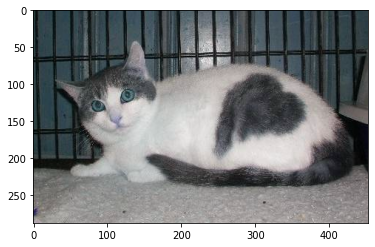

In [ ]:
# Check that images are retrievable
import matplotlib.pyplot as plt

import cv2
img = cv2.imread('train/train/'+df['filename'][1049], cv2.IMREAD_COLOR)
plt.imshow(img)

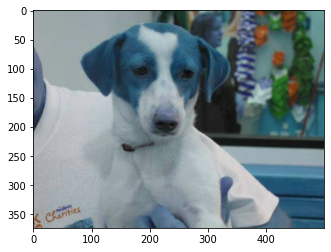

In [ ]:
# Check that images are retrievable
import matplotlib.pyplot as plt

import cv2
img = cv2.imread('train/train/'+df['filename'][10], cv2.IMREAD_COLOR)
plt.imshow(img)

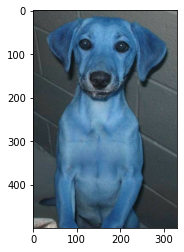

In [ ]:
# Check that images are retrievable
import matplotlib.pyplot as plt

import cv2
img = cv2.imread('train/train/'+df['filename'][53], cv2.IMREAD_COLOR)
plt.imshow(img)

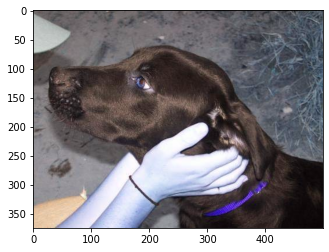

In [ ]:
# Check that images are retrievable
import matplotlib.pyplot as plt

import cv2
img = cv2.imread('train/train/'+df['filename'][199], cv2.IMREAD_COLOR)
plt.imshow(img)

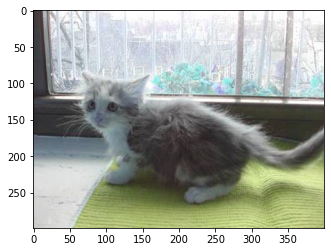

In [ ]:
# Check that images are retrievable
import matplotlib.pyplot as plt

import cv2
img = cv2.imread('train/train/'+df['filename'][867], cv2.IMREAD_COLOR)
plt.imshow(img)

In [ ]:
# Resize images
import cv2
import numpy as np

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((25000,80,80,3)) # 25000 images, 80x80 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/train/'+image_file)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, df['category'], test_size = 1/5, shuffle=False)

In [ ]:
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full, y_train_full, test_size=1/4, shuffle=False)

In [ ]:
X_train_full.shape

(20000, 80, 80, 3)

In [ ]:
X_train_tr.shape

(15000, 80, 80, 3)

**Part 1** <br/>
Create a CNN dog/cat classifier with the following architecture: <br/>
Conv2D: 64 filters, 7x7 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
Conv2D: 128 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
Conv2D: 256 filters, 3x3 kernel <br/>
MaxPooling2D: 2x2 pool <br/>
Flatten <br/>
Dense: 128 neurons <br/>
Dropout(15%) <br/>
Dense: 64 neurons <br/>
Dropout(15%) <br/>
Output <br/>
strides=1, padding="same", and activation="relu" for all relevant layers <br/>
Utilize the Nadam optimizer and Early Stopping

What is your accuracy for the validation set and for the test set? Plot several misclassified images.

Save your accuracy and val_accuracy each epoch. You will plot them in Part 4.

In [ ]:
from warnings import filters
from tensorflow import keras
import tensorflow as tf

# Build a simple CNN
model = keras.models.Sequential([
        keras.layers.Conv2D(filters=64, kernel_size=[7,7], strides=[1,1],
                            padding="same", activation="relu", input_shape=[80,80,3]),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="relu"),
        keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same",
                            activation="relu"),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(256, 3),
        keras.layers.Conv2D(256, 3),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(10, activation="softmax")
])

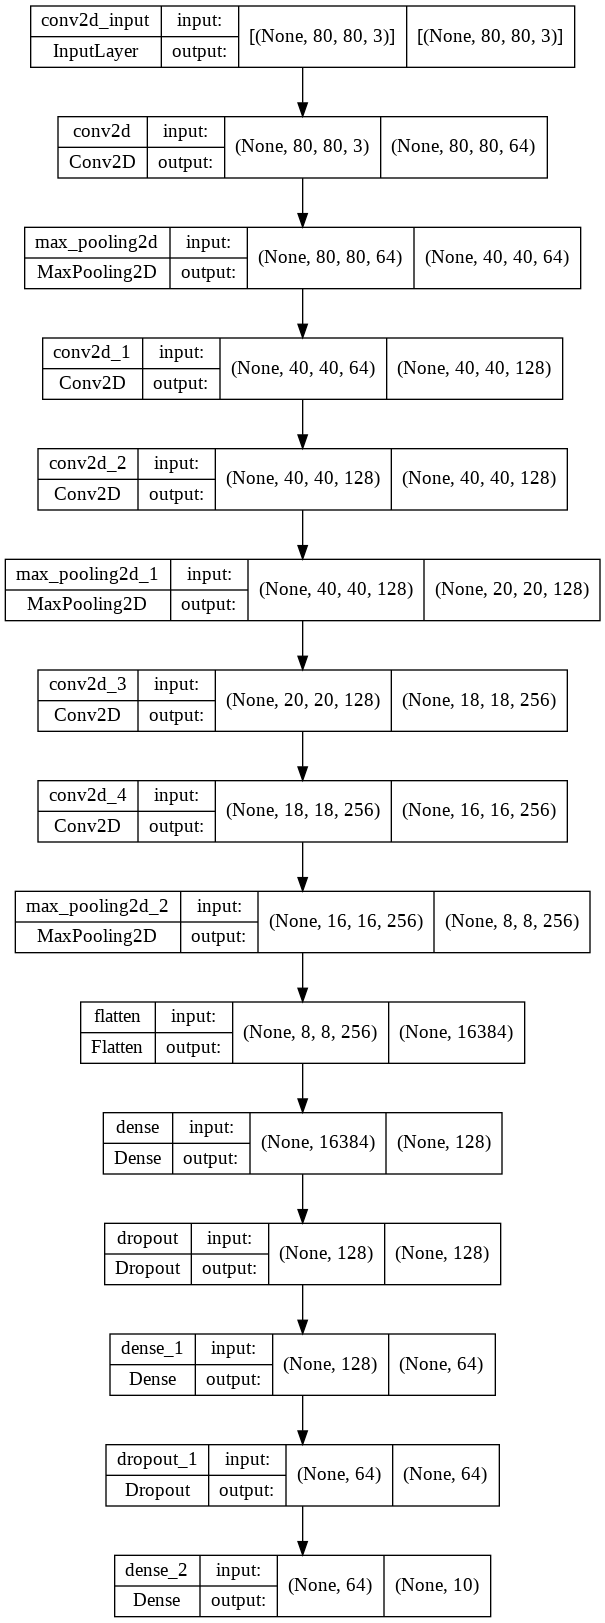

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
# Compile with Nadam Optimizer
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['binary_accuracy'])

In [ ]:
# Build model using early stopping
%%time
history = model.fit(X_train_tr, y_train_tr, epochs=100, batch_size=32,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])
# This is really bad

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 27s 35ms/step - loss: 22.1509 - binary_accuracy: 0.4981 - val_loss: 0.8251 - val_binary_accuracy: 0.4989
Epoch 2/100
469/469 [==============================] - 15s 32ms/step - loss: 0.8502 - binary_accuracy: 0.4985 - val_loss: 0.6975 - val_binary_accuracy: 0.4989
Epoch 3/100
469/469 [==============================] - 15s 32ms/step - loss: 0.7297 - binary_accuracy: 0.4985 - val_loss: 0.6999 - val_binary_accuracy: 0.4989
Epoch 4/100
469/469 [==============================] - 15s 32ms/step - loss: 0.7109 - binary_accuracy: 0.4986 - val_loss: 0.6945 - val_binary_accuracy: 0.4989
Epoch 5/100
469/469 [==============================] - 15s 32ms/step - loss: 0.7611 - binary_accuracy: 0.4986 - val_loss: 0.6934 - val_binary_accuracy: 0.4989
Epoch 6/100
469/469 [==============================] - 15s 32ms/step - loss: 0.7004 - binary_accuracy: 0.4986 - val_loss: 0.6937 - val_binary_accuracy: 0.4989
Epoch 7/100
469/469 [==============================] - 15

In [ ]:
model.evaluate(X_train_v, y_train_v)

157/157 [==============================] - 2s 11ms/step - loss: 0.6946 - binary_accuracy: 0.4989


[0.6945809125900269, 0.4988800287246704]

In [ ]:
import pickle

model_1 = pickle.dumps(history.history)

In [ ]:
keras.backend.clear_session()

**Part 2** </br>
Add data augmentation. Try different CNN architectures and/or parameters to improve your model. You may also try splitting up the dataset differently (ie more images in training and less in validation and testing sets).

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [ ]:
# Compile the model (it is the same)
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [ ]:
# Build the model -- this is where we implement the data augmentation
history = model.fit(datagen.flow(X_train_tr, y_train_tr, batch_size=32),
                    epochs=100,
                    validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
469/469 [==============================] - 27s 54ms/step - loss: 3.2422 - accuracy: 0.4984 - val_loss: 0.6953 - val_accuracy: 0.4986
Epoch 2/100
469/469 [==============================] - 25s 54ms/step - loss: 0.6993 - accuracy: 0.5001 - val_loss: 0.6942 - val_accuracy: 0.4986
Epoch 3/100
469/469 [==============================] - 25s 53ms/step - loss: 0.6980 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 4/100
469/469 [==============================] - 25s 53ms/step - loss: 0.6955 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 5/100
469/469 [==============================] - 25s 53ms/step - loss: 0.6949 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5014
Epoch 6/100
469/469 [==============================] - 24s 52ms/step - loss: 0.6947 - accuracy: 0.4983 - val_loss: 0.6937 - val_accuracy: 0.4986
Epoch 7/100
469/469 [==============================] - 25s 53ms/step - loss: 0.6941 - accuracy: 0.5020 - val_loss: 0.6931 - val_ac

In [ ]:
model.evaluate(X_train_v, y_train_v)

157/157 [==============================] - 2s 11ms/step - loss: 0.6939 - accuracy: 0.5014


[0.6939007043838501, 0.5013999938964844]

In [ ]:
import pickle

model_2 = pickle.dumps(history.history)

In [ ]:
keras.backend.clear_session()

In [ ]:
X_train_full = []
y_train_full = []
X_test = []
y_test = []
X_train_tr = []
y_train_tr = []
X_train_v = []
y_train_v = []

**Part 3**</br>
Use transfer learning. Train on at least three different expert CNNs: Xception, a variant of ResNet, and a variant of EfficientNet. See [here](https://keras.io/api/applications/) for a full list of models available in Keras. Please note that many of these have special requirements (for image size etc). You decide (or experiment with) how to best transfer learn on these expert CNNs.

What is the accuracy of your best model (on both validation and testing sets)? Plot several misclassified images. Save your accuracy and val_accuracy per epoch (from your best model). You will plot them in Part 4.



## ResNet50

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, df['category'], test_size = 1/5, shuffle=False)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full, y_train_full, test_size=1/4, shuffle=False)

In [ ]:
y_train_tr.shape

(15000,)

In [ ]:
X_train_tr.shape

(15000, 80, 80, 3)

In [ ]:
tf.keras.applications.resnet.preprocess_input(X_train_tr)
tf.keras.applications.resnet.preprocess_input(X_train_v)

array([[[[  72.061,   61.221,   43.32 ],
         [  70.061,   59.221,   41.32 ],
         [  74.061,   61.221,   44.32 ],
         ...,
         [  24.061,   13.221,   -4.68 ],
         [  24.061,   13.221,   -4.68 ],
         [  24.061,   13.221,   -4.68 ]],

        [[  72.061,   61.221,   43.32 ],
         [  70.061,   59.221,   41.32 ],
         [  74.061,   61.221,   44.32 ],
         ...,
         [  24.061,   13.221,   -4.68 ],
         [  24.061,   13.221,   -4.68 ],
         [  24.061,   13.221,   -4.68 ]],

        [[  72.061,   61.221,   43.32 ],
         [  72.061,   61.221,   43.32 ],
         [  77.061,   64.221,   47.32 ],
         ...,
         [  23.061,   12.221,   -5.68 ],
         [  24.061,   13.221,   -4.68 ],
         [  24.061,   13.221,   -4.68 ]],

        ...,

        [[ 113.061,  100.221,   93.32 ],
         [  97.061,   84.221,   77.32 ],
         [ 114.061,  101.221,   94.32 ],
         ...,
         [   5.061,   -7.779,  -14.68 ],
         [ -15.939,  -

In [ ]:
# Resize images
X_train_tr = tf.image.resize(X_train_tr, [32,32])
X_train_v = tf.image.resize(X_train_v, [32,32])

In [ ]:
X_train_tr.shape

TensorShape([15000, 32, 32, 3])

In [ ]:
# Implement transfer learning using ResNet50
base_model = keras.applications.ResNet50(weights="imagenet",
                                         include_top=False,
                                         input_shape=(32,32,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(10, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Now we will train the model
# This will use freezing and transfer layers
for layer in base_model.layers:
  layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_tr, y_train_tr, batch_size=32,
                    epochs=50, validation_data=(X_train_v, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 13s 21ms/step - loss: 0.8792 - accuracy: 0.6983 - val_loss: 0.7648 - val_accuracy: 0.7090
Epoch 2/50
469/469 [==============================] - 8s 18ms/step - loss: 0.6282 - accuracy: 0.7463 - val_loss: 0.6681 - val_accuracy: 0.7348
Epoch 3/50
469/469 [==============================] - 8s 18ms/step - loss: 0.5875 - accuracy: 0.7572 - val_loss: 0.6750 - val_accuracy: 0.7256
Epoch 4/50
469/469 [==============================] - 8s 18ms/step - loss: 0.5816 - accuracy: 0.7561 - val_loss: 0.6546 - val_accuracy: 0.7452
Epoch 5/50
469/469 [==============================] - 8s 18ms/step - loss: 0.5803 - accuracy: 0.7617 - val_loss: 0.6541 - val_accuracy: 0.7310
Epoch 6/50
469/469 [==============================] - 8s 18ms/step - loss: 0.5626 - accuracy: 0.7625 - val_loss: 0.7010 - val_accuracy: 0.7218
Epoch 7/50
469/469 [==============================] - 8s 18ms/step - loss: 0.5652 - accuracy: 0.7682 - val_loss: 0.7181 - val_accuracy: 0.723

In [ ]:
model.evaluate(X_train_v, y_train_v)

157/157 [==============================] - 2s 13ms/step - loss: 0.6726 - accuracy: 0.7446


[0.6725996136665344, 0.7445999979972839]

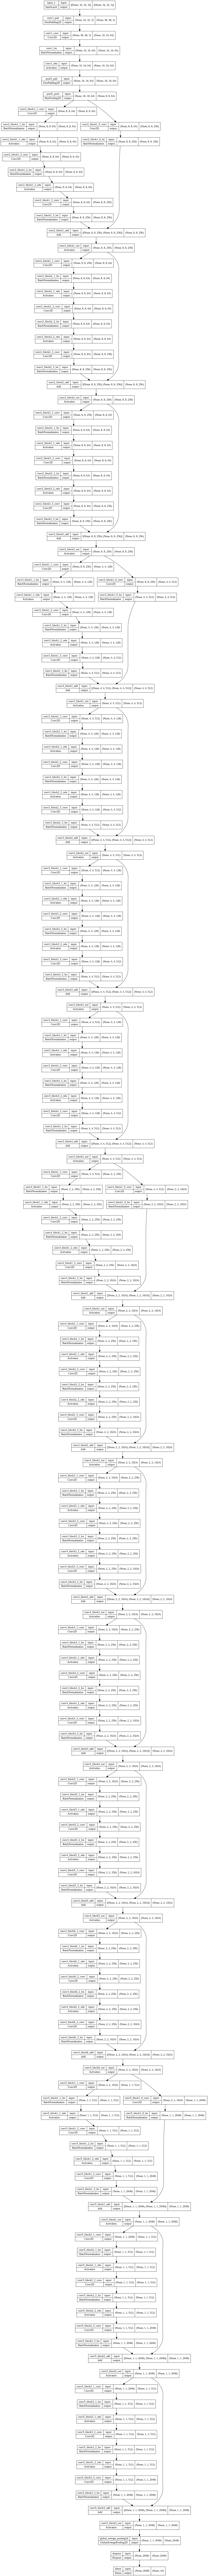

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
import pickle

model_3 = pickle.dumps(history.history)

In [ ]:
keras.backend.clear_session()
X_train_full = []
y_train_full = []

## Xception

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, df['category'], test_size = 1/5, shuffle=False)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full, y_train_full, test_size=1/4, shuffle=False)

In [ ]:
y_train_tr.shape

(15000,)

In [ ]:
X_train_tr.shape

(15000, 80, 80, 3)

In [ ]:
# This part is just like ResNet, as this is a variation of ResNet
tf.keras.applications.xception.preprocess_input(X_train_tr)
tf.keras.applications.xception.preprocess_input(X_train_v)

array([[[[ 0.30980392,  0.39607843,  0.38039216],
         [ 0.29411765,  0.38039216,  0.36470588],
         [ 0.31764706,  0.39607843,  0.39607843],
         ...,
         [-0.06666667,  0.01960784,  0.00392157],
         [-0.06666667,  0.01960784,  0.00392157],
         [-0.06666667,  0.01960784,  0.00392157]],

        [[ 0.30980392,  0.39607843,  0.38039216],
         [ 0.29411765,  0.38039216,  0.36470588],
         [ 0.31764706,  0.39607843,  0.39607843],
         ...,
         [-0.06666667,  0.01960784,  0.00392157],
         [-0.06666667,  0.01960784,  0.00392157],
         [-0.06666667,  0.01960784,  0.00392157]],

        [[ 0.30980392,  0.39607843,  0.38039216],
         [ 0.30980392,  0.39607843,  0.38039216],
         [ 0.34117647,  0.41960784,  0.41960784],
         ...,
         [-0.0745098 ,  0.01176471, -0.00392157],
         [-0.06666667,  0.01960784,  0.00392157],
         [-0.06666667,  0.01960784,  0.00392157]],

        ...,

        [[ 0.70196078,  0.70196078,  0

In [ ]:
# Resize
X_train_X = tf.image.resize(X_train_tr, [71,71])
X_valid_X = tf.image.resize(X_train_v, [71,71])

In [ ]:
X_train_X.shape

TensorShape([15000, 71, 71, 3])

In [ ]:
# Now we will use Xception. It uses data augmentation and dropout

base_model = keras.applications.Xception(weights="imagenet", 
                                              include_top=False,
                                         input_shape=(71,71,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg) 
output = keras.layers.Dense(10, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])

history = model.fit(datagen.flow(X_train_X, y_train_tr, batch_size=32), 
                    epochs=50, validation_data=(X_valid_X, y_train_v), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
469/469 [==============================] - 27s 51ms/step - loss: 0.4848 - accuracy: 0.7721 - val_loss: 0.3904 - val_accuracy: 0.8320
Epoch 2/50
469/469 [==============================] - 22s 47ms/step - loss: 0.4212 - accuracy: 0.8009 - val_loss: 0.3707 - val_accuracy: 0.8326
Epoch 3/50
469/469 [==============================] - 22s 47ms/step - loss: 0.4067 - accuracy: 0.8134 - val_loss: 0.4126 - val_accuracy: 0.8214
Epoch 4/50
469/469 [==============================] - 22s 48ms/step - loss: 0.4005 - accuracy: 0.8179 - val_loss: 0.3626 - val_accuracy: 0.8416
Epoch 5/50
469/469 [==============================] - 22s 48ms/step - loss: 0.3946 - accuracy: 0.8188 - val_loss: 0.3727 - val_accuracy: 0.8350
Epoch 6/50
469/469 [==============================] - 22s 47ms/step - loss: 0.3931 - accuracy: 0.8185 - val_loss: 0.3690 - val_accuracy: 0.8376
Epoch 7/50
469/469 [==============================] - 22s 47ms/step - loss: 0.3886 - accuracy: 0.8237 - val_loss: 0.3742 - val_accuracy:

In [ ]:
# We can probably retrain for higher accuracy, hopefully not too overfit
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 100
batch_size = 32
history = model.fit(datagen.flow(X_train_X, y_train_tr, batch_size=batch_size),
                    epochs=n_epochs,
                    validation_data=(X_valid_X, y_train_v),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
469/469 [==============================] - 64s 107ms/step - loss: 0.3443 - accuracy: 0.8523 - val_loss: 0.2152 - val_accuracy: 0.9124
Epoch 2/100
469/469 [==============================] - 48s 103ms/step - loss: 0.2035 - accuracy: 0.9155 - val_loss: 0.2143 - val_accuracy: 0.9160
Epoch 3/100
469/469 [==============================] - 48s 103ms/step - loss: 0.1362 - accuracy: 0.9450 - val_loss: 0.1897 - val_accuracy: 0.9304
Epoch 4/100
469/469 [==============================] - 48s 103ms/step - loss: 0.1041 - accuracy: 0.9602 - val_loss: 0.2108 - val_accuracy: 0.9298
Epoch 5/100
469/469 [==============================] - 48s 103ms/step - loss: 0.0829 - accuracy: 0.9695 - val_loss: 0.1960 - val_accuracy: 0.9302
Epoch 6/100
469/469 [==============================] - 48s 103ms/step - loss: 0.0685 - accuracy: 0.9756 - val_loss: 0.1926 - val_accuracy: 0.9368
Epoch 7/100
469/469 [==============================] - 48s 103ms/step - loss: 0.0577 - accuracy: 0.9797 - val_loss: 0.2099 -

In [ ]:
import pickle

model_4 = pickle.dumps(history.history)

In [ ]:
keras.backend.clear_session()
X_train_full = []
y_train_full = []
X_test = []
y_test = []
X_train_tr = []
y_train_tr = []
X_train_v = []
y_train_v = []

## EfficientNet

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, df['category'], test_size = 1/5, shuffle=False)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full, y_train_full, test_size=1/4, shuffle=False)

In [ ]:
X_train_tr.shape

(15000, 80, 80, 3)

In [ ]:
X_train_X = tf.image.resize(X_train_tr[:1000], [224,224])
X_valid_X = tf.image.resize(X_train_v, [224,224])

In [ ]:
X_train_tr.shape

(15000, 80, 80, 3)

In [ ]:
X_train_X.shape

TensorShape([1000, 224, 224, 3])

In [ ]:
y_train_tr.shape

(15000,)

In [ ]:
# use data augmentation
base_model = keras.applications.EfficientNetB0(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.05)(global_avg) 
output = keras.layers.Dense(10, activation="softmax")(dropout)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# This will make it so that the y actually works
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [ ]:
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])


CPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms
Wall time: 15.6 ms


In [ ]:


# Compile the model

history = model.fit(datagen.flow(X_train_X, y_train_tr[:10000], batch_size=32), 
                    epochs=50, validation_data=(X_valid_X, y_train_v), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

ValueError: ignored

In [ ]:
X_train_full = []
y_train_full = []
X_test = []
y_test = []
X_train_tr = []
y_train_tr = []
X_train_v = []
y_train_v = []

In [ ]:
import pickle

model_5 = pickle.dumps(history.history)

In [ ]:
keras.backend.clear_session()

**Part 4**</br>
Plot the training and validation accuracy per epoch for your (best) model from each part. Discuss any differences. Which model(s) tend to be overfit? Which model(s) are not? Why?

Note: If you have a model B that is only a little better than a model A with respect to validation/testing accuracy, but model B is not overfit and model A is, that is actually a huge improvement. 

In [ ]:
history_1 = pickle.loads(model_1)

In [ ]:
type(history_1)

dict

In [ ]:
print(history_1)

{'loss': [22.150890350341797, 0.8502032160758972, 0.7297195792198181, 0.7108500599861145, 0.7611338496208191, 0.7004277110099792, 0.6986057162284851, 0.6979970932006836, 0.696692943572998, 0.6970118284225464, 0.6956830620765686, 0.6973670125007629], 'binary_accuracy': [0.4981066584587097, 0.49848031997680664, 0.49846649169921875, 0.4985997676849365, 0.498613178730011, 0.4985998570919037, 0.4983731508255005, 0.49867984652519226, 0.49857354164123535, 0.49856019020080566, 0.49862661957740784, 0.49854665994644165], 'val_loss': [0.8251304626464844, 0.6975253820419312, 0.6998735070228577, 0.6945288777351379, 0.6933998465538025, 0.6937232613563538, 0.6930099129676819, 0.6933851838111877, 0.6940149664878845, 0.6932439208030701, 0.6931794881820679, 0.6945809125900269], 'val_binary_accuracy': [0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.4988800287246704, 0.498

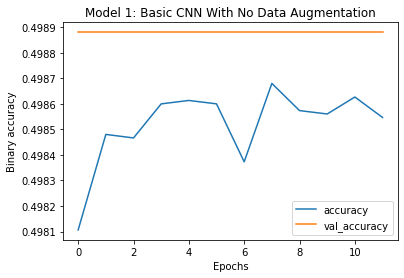

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(12), (history_1['binary_accuracy']), label = 'accuracy')
plt.plot(np.arange(12), (history_1['val_binary_accuracy']), label = 'val_accuracy')

plt.ylabel("Binary accuracy")
plt.xlabel("Epochs")

plt.title("Model 1: Basic CNN With No Data Augmentation")
plt.legend()

{'loss': [3.2422420978546143, 0.6992520689964294, 0.6979842185974121, 0.6955384016036987, 0.6948917508125305, 0.694664716720581, 0.694088876247406, 0.6954280734062195, 0.6948124170303345, 0.6949942111968994], 'accuracy': [0.4984000027179718, 0.5000666379928589, 0.4949333369731903, 0.49646666646003723, 0.49900001287460327, 0.49826666712760925, 0.5019999742507935, 0.5012000203132629, 0.4946666657924652, 0.5008000135421753], 'val_loss': [0.6952923536300659, 0.6942453384399414, 0.693192183971405, 0.6932379007339478, 0.693144679069519, 0.6936652660369873, 0.6931463479995728, 0.6937296986579895, 0.6931480765342712, 0.6939007043838501], 'val_accuracy': [0.4986000061035156, 0.4986000061035156, 0.4986000061035156, 0.5013999938964844, 0.5013999938964844, 0.4986000061035156, 0.5013999938964844, 0.5013999938964844, 0.4986000061035156, 0.5013999938964844]}


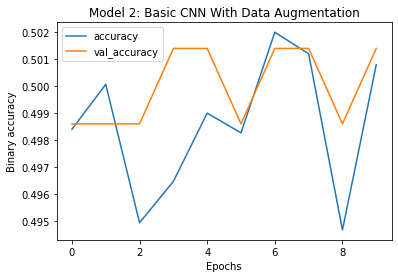

In [ ]:
history_2 = pickle.loads(model_2)
import matplotlib.pyplot as plt
plt.plot(np.arange(10), (history_2['accuracy']), label = 'accuracy')
plt.plot(np.arange(10), (history_2['val_accuracy']), label = 'val_accuracy')

plt.ylabel("Binary accuracy")
plt.xlabel("Epochs")

plt.title("Model 2: Basic CNN With Data Augmentation")
plt.legend()


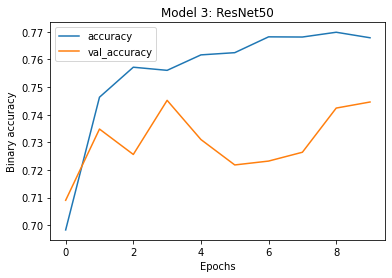

In [ ]:
history_3 = pickle.loads(model_3)
import matplotlib.pyplot as plt
plt.plot(np.arange(10), (history_3['accuracy']), label = 'accuracy')
plt.plot(np.arange(10), (history_3['val_accuracy']), label = 'val_accuracy')

plt.ylabel("Binary accuracy")
plt.xlabel("Epochs")

plt.title("Model 3: ResNet50")
plt.legend()


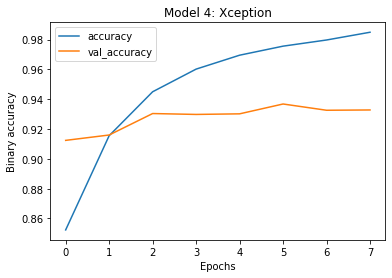

In [ ]:
history_4 = pickle.loads(model_4)
import matplotlib.pyplot as plt
plt.plot(np.arange(8), (history_4['accuracy']), label = 'accuracy')
plt.plot(np.arange(8), (history_4['val_accuracy']), label = 'val_accuracy')

plt.ylabel("Binary accuracy")
plt.xlabel("Epochs")

plt.title("Model 4: Xception")
plt.legend()

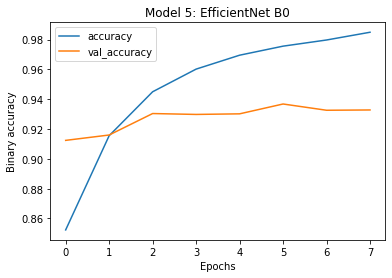

In [ ]:
history_5 = pickle.loads(model_5)
import matplotlib.pyplot as plt
plt.plot(np.arange(8), (history_5['accuracy']), label = 'accuracy')
plt.plot(np.arange(8), (history_5['val_accuracy']), label = 'val_accuracy')

plt.ylabel("Binary accuracy")
plt.xlabel("Epochs")

plt.title("Model 5: EfficientNet B0")
plt.legend()

My 4th model using Xception had the highest accuracy with close to 96% accuracy. It was slightly overfit, but none of the other mocels had a high enough accuracy to justify being a better model. 

**GRADUATE STUDENTS ONLY**</br>
Again, test your best model on the Kaggle testing set and submit. Show a screenshot etc as proof.